
# CNN手寫辨識


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  #協助清理資料的套件


In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test)=mnist.load_data() 

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#一個channel --->(28,28,1)

In [13]:
x_train=x_train.reshape(60000, 28, 28, 1) /255   #標準化數據

In [63]:
x_test=x_test.reshape(10000, 28, 28, 1) /255

In [15]:
x_train[22].shape

(28, 28, 1)

In [64]:
x_test[22].shape

(28, 28, 1)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
#filter (3*3)  --->通常是由小至大

In [19]:
#讀入必要的函式

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# step1 打造函數學習機(CNN)

In [23]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))

輸出16個28*28矩陣 /第一層
事實上是(28,28,16)


In [27]:
model.add(MaxPooling2D(pool_size=(2,2)))   #(14, 14, 16)

In [28]:
model.add(Conv2D(32, (3,3), padding='same', activation='relu')) #第二層

In [29]:
# output (14, 14, 32)

In [30]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
# output (7, 7, 32)

In [32]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu')) #第三層

In [33]:
model.add(MaxPooling2D(pool_size=(2,2))) #output=...?

In [34]:
model.add(Flatten()) #拉平

In [36]:
model.add(Dense(54, activation='relu'))

In [37]:
model.add(Dense(10, activation='softmax'))  #輸出10的矩陣 加起來=1

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [39]:
# 每一個filter -->3*3 (權重) + 1 = 10

# ((3*3*16)+1)*32=4640
# (一個filter=3*3 共有16層 + 偏值)*32層

In [41]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

# step 2 fit 

In [43]:
model.fit(x_train, y_train, batch_size=128, epochs=12) 

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 41s 682us/sample - loss: 0.0708 - accuracy: 0.6020
Epoch 2/12
60000/60000 [==============================] - 38s 631us/sample - loss: 0.0101 - accuracy: 0.9315
Epoch 3/12
60000/60000 [==============================] - 39s 645us/sample - loss: 0.0054 - accuracy: 0.9650
Epoch 4/12
60000/60000 [==============================] - 38s 639us/sample - loss: 0.0043 - accuracy: 0.9723
Epoch 5/12
60000/60000 [==============================] - 39s 653us/sample - loss: 0.0035 - accuracy: 0.9775
Epoch 6/12
60000/60000 [==============================] - 40s 671us/sample - loss: 0.0031 - accuracy: 0.9800
Epoch 7/12
60000/60000 [==============================] - 38s 637us/sample - loss: 0.0027 - accuracy: 0.9826
Epoch 8/12
60000/60000 [==============================] - 39s 651us/sample - loss: 0.0024 - accuracy: 0.9847
Epoch 9/12
60000/60000 [==============================] - 41s 681us/sample - loss: 0.0022 - accuracy: 0.9

In [65]:
result = model.predict_classes(x_test)

In [66]:
def my_predict(n):
    print('CNN 預測： ', result[n])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap='Greys')
    

CNN 預測：  5


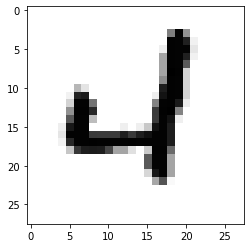

In [76]:
n=399
my_predict(n)

In [67]:
from ipywidgets import interact_manual

In [68]:
from ipywidgets import interact_manual
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [69]:
score = model.evaluate(x_test, y_test)  #測試model跟正確答案差多少

10000/10000 [==============================] - 4s 398us/sample - loss: 0.0900 - accuracy: 0.0892


In [70]:
loss, acc=score

In [71]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.0892


# 把model存起來

In [73]:
model.save('myCNNmodel.h5')